In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

In [83]:
filename = 'counters_vgg16_np48_cached.csv'
#filename = 'counters_vgg16_np32.csv'
#filename = 'counters_resnet50_np48.csv'
#filename = 'counters_inception4_np48.csv'

In [84]:
raw_df = pd.read_csv(filename, names=['t','counter','rate_gbps','device', 'port', 'counter_name'])

In [85]:
df = raw_df
# Start time at 0
df.t = df.t - df.t.min()
# Start counters at 0
df['counter'] = df.groupby(['device','port','counter_name'])['counter'].transform(lambda x: x - x.min())
df['MB'] = df['counter'] * 4e-6
clean_df = df

In [86]:
# Show mean and max rate
clean_df.groupby(['device','port','counter_name'])[['rate_gbps']].agg(['mean','max'])

rate_gbps         
                                mean      max
device port counter_name                     
0      1    port_rcv_data   2.617637   87.500
            port_xmit_data  2.618736   84.935
1      1    port_rcv_data   2.620863  183.504
            port_xmit_data  2.621739  138.380
8      1    port_rcv_data   2.620165   82.125
            port_xmit_data  2.620236   85.071
9      1    port_rcv_data   2.619980   83.329
            port_xmit_data  2.617615   84.166

In [87]:
# Show total bytes
clean_df.groupby(['device','port','counter_name'])[['MB']].max()

MB
device port counter_name                
0      1    port_rcv_data   21212.430200
            port_xmit_data  21211.880616
1      1    port_rcv_data   21219.717952
            port_xmit_data  21219.427436
8      1    port_rcv_data   21221.596088
            port_xmit_data  21221.036056
9      1    port_rcv_data   21212.642928
            port_xmit_data  21212.457900

In [88]:
df = clean_df.copy()
df = df[df.device.isin([0,1])]
t0 = 0.20
df = df[(df.t > t0) & (df.t < t0 + 2.0)]

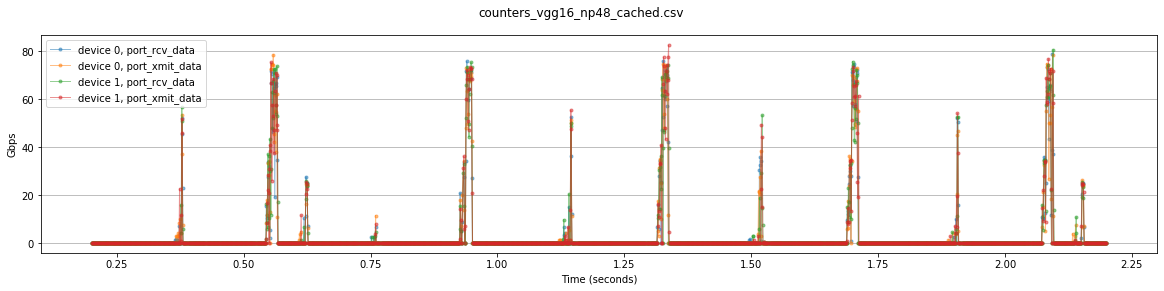

In [89]:
fig0, ax0 = plt.subplots(figsize=(20,4))
fig0.suptitle(filename, fontsize=12)
for name, group in df.groupby(['device','counter_name']):
    plt.plot(group.t.values, group.rate_gbps.values, '.-', label='device %d, %s' % name, axes=ax0, alpha=0.5, linewidth=1)
ax0.grid('on', which='both', axis='y')
ax0.legend(loc='best')
ax0.set_ylabel('Gbps')
ax0.set_xlabel('Time (seconds)')
plt.show()
plt.close()    

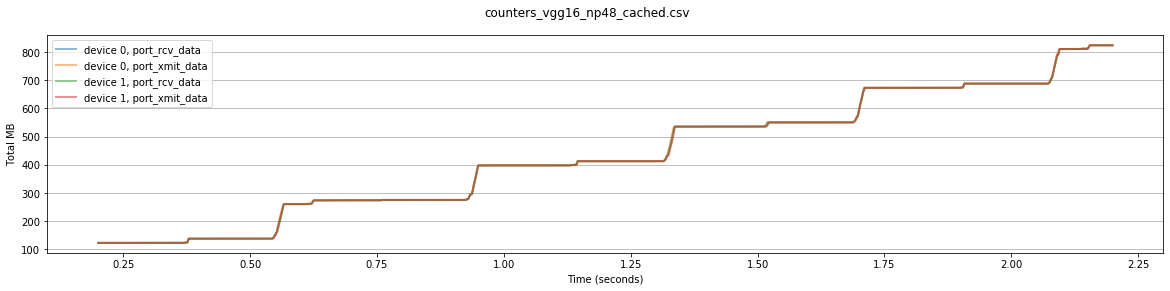

In [90]:
fig0, ax0 = plt.subplots(figsize=(20,4))
fig0.suptitle(filename, fontsize=12)
for name, group in df.groupby(['device','counter_name']):
    plt.plot(group.t.values, group.MB.values, '-', label='device %d, %s' % name, axes=ax0, alpha=0.5, linewidth=2)
ax0.grid('on', which='both', axis='y')
ax0.legend(loc='best')
ax0.set_ylabel('Total MB')
ax0.set_xlabel('Time (seconds)')
plt.show()
plt.close()   